In [ ]:
#ctrl + F9 = 모든 셀 실행
#특정 셀 선택 후 shift + Enter = 해당 셀 부터 실행

In [ ]:
! pip install --quiet "pytorch-lightning>=1.4, <2.1.0" "urllib3"
"ipython[notebook]>=8.0.0, <8.17.0" "torchmetrics>=0.7, <1.3" "torch>=1.8.1,<2.1.0"
"matplotlib>=3.0.0, <3.9.0" "matplotlib" "lightning>=2.0.0" "setuptools>=68.0.0, <68.3.0"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 727.7/727.7 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 33.3 MB/s eta 0:00:00


'matplotlib>=3.0.0, <3.9.0matplotliblightning>=2.0.0setuptools>=68.0.0, <68.3.0'

In [ ]:
import time

import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib_inline.backend_inline
import numpy as np
import torch
import torch.nn as nn
import torch.utils.data as data
from matplotlib.colors import to_rgba
from torch import Tensor
from tqdm.notebook import tqdm  # Progress bar

matplotlib_inline.backend_inline.set_matplotlib_formats("svg", "pdf")  # For export
##코랩에 이미 설치 완료된듯.

In [ ]:
#The basic of pytorch

print("Using torch", torch.__version__) #version check
#코드가 최신일 경우 수정필요 x

Using torch 2.5.1+cu121


In [ ]:
#정확히 동일한 난수로 코드를 재현할 수 있도록 시드설정
torch.manual_seed(42)  # Setting the seed

In [ ]:
#Tensors

#텐서란 numpy 배열과 동일한 pytorch(+gpu가속을 지원) / 벡터는 1차원 텐서 / 행렬은 2차원 텐서

#초기화_텐서 만드는 법
torch.zeros
x = torch.randn(2, 3, 4) # x = Tensor(2,3,4)로도 가능, 이 경우 난수로 채워지는듯.
print(x) ##형태가 중요한듯

tensor([[[ 1.9269,  1.4873,  0.9007, -2.1055],
         [ 0.6784, -1.2345, -0.0431, -1.6047],
         [ 0.3559, -0.6866, -0.4934,  0.2415]],

        [[-1.1109,  0.0915, -2.3169, -0.2168],
         [-0.3097, -0.3957,  0.8034, -0.6216],
         [-0.5920, -0.0631, -0.8286,  0.3309]]])


In [ ]:
# Create a tensor from a (nested) list
x = Tensor([[1, 2], [3, 4]])
print(x)

tensor([[1., 2.],
        [3., 4.]])


In [ ]:
# Create a tensor with random values between 0 and 1 with the shape [2, 3, 4]
x = torch.rand(2, 3, 4)
print(x)

tensor([[[0.6343, 0.3644, 0.7104, 0.9464],
         [0.7890, 0.2814, 0.7886, 0.5895],
         [0.7539, 0.1952, 0.0050, 0.3068]],

        [[0.1165, 0.9103, 0.6440, 0.7071],
         [0.6581, 0.4913, 0.8913, 0.1447],
         [0.5315, 0.1587, 0.6542, 0.3278]]])


In [ ]:
#텐서의 모양 얻기 - .shape 또는 .size

shape = x.shape
print("Shape:", x.shape)

size = x.size()
print("Size:", size)

dim1, dim2, dim3 = x.size()
print("Size:", dim1, dim2, dim3)

Shape: torch.Size([2, 3, 4])
Size: torch.Size([2, 3, 4])
Size: 2 3 4


In [ ]:
#Tensor <- numpy - torch.from_numpy
np_arr = np.array([[1, 2], [3, 4]])
tensor = torch.from_numpy(np_arr)

print("Numpy array:", np_arr)
print("PyTorch tensor:", tensor)


#Tensor -> numpy - .numpy() / 텐서를 넘파이로 변환하려면 텐서가 gpu가 아닌 cpu에 있어야 함. (.cpu()활용), 근데 자동으로 될때도 있음.
tensor= torch.arange(4)
np_arr = tensor.numpy()

print("Pytorch tensor:", tensor)
print("Numpy array:", np_arr)

Numpy array: [[1 2]
 [3 4]]
PyTorch tensor: tensor([[1, 2],
        [3, 4]])
Pytorch tensor: tensor([0, 1, 2, 3])
Numpy array: [0 1 2 3]


In [ ]:
#연산 - numpy에 존재하는 대부분의 연산은 Pytorch에도 존재함
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
y = x1 + x2

print("X1", x1)
print("X2", x2)
print("Y", y)

X1 tensor([[0.6532, 0.3958, 0.9147],
        [0.2036, 0.2018, 0.2018]])
X2 tensor([[0.9497, 0.6666, 0.9811],
        [0.0874, 0.0041, 0.1088]])
Y tensor([[1.6029, 1.0625, 1.8958],
        [0.2910, 0.2059, 0.3106]])


In [ ]:
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
print("X1 (before)", x1)
print("X2 (before)", x2)

x2.add_(x1) # in-place operation =  _활용 / 연산전의 x2값에 다시 접근 불가능
print("X1 (after)", x1)
print("X2 (after)", x2)

X1 (before) tensor([[0.1637, 0.7025, 0.6790],
        [0.9155, 0.2418, 0.1591]])
X2 (before) tensor([[0.7653, 0.2979, 0.8035],
        [0.3813, 0.7860, 0.1115]])
X1 (after) tensor([[0.1637, 0.7025, 0.6790],
        [0.9155, 0.2418, 0.1591]])
X2 (after) tensor([[0.9289, 1.0004, 1.4825],
        [1.2968, 1.0278, 0.2707]])


In [ ]:
#일반적인 연산은 텐서의 모양을 변경하는 것을 목표로 함.
x = torch.arange(6)
print("X", x)

x = x.view(2,3) #행,열의 순서
print("X", x)

x = x.permute(1,0) #0차원과 1차원을 교환 - 직관적이진 않음. 모양으로 이해.
print("X", x)

X tensor([0, 1, 2, 3, 4, 5])
X tensor([[0, 1, 2],
        [3, 4, 5]])
X tensor([[0, 3],
        [1, 4],
        [2, 5]])


In [ ]:
#신경망에 필수적인 행렬곱셈 - torch.(matmul/mm/bmm/einsum...)
#주로matmul 또는 bmm 을 사용

#matmul
x = torch.arange(6)
x = x.view(2, 3)
print("X", x)

W = torch.arange(9).view(3, 3)  # We can also stack multiple operations in a single line
print("W", W)

h = torch.matmul(x, W)  # Verify the result by calculating it by hand too!
print("h", h)

X tensor([[0, 1, 2],
        [3, 4, 5]])
W tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
h tensor([[15, 18, 21],
        [42, 54, 66]])


In [ ]:
#tensor indexing(선택)

x = torch.arange(12).view(3, 4)
print("X", x)

print(x[:, 1])  # Second column
print(x[0]) #First row

print(x[:2,-1]) #First two rows, last column
print(x[1:3, :])

X tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor([1, 5, 9])
tensor([0, 1, 2, 3])
tensor([3, 7])
tensor([[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


In [ ]:
#Dynamic Computation Graph and Backpropagation

#어떤 텐서가 그래디언트를 필요로 하는지 지정/기본적으로, 텐서를 생성할때 그래디언트 필요x

x = torch.ones((3,))
print(x.requires_grad)

#함수를 사용하여 기존텐서에 대해 변경
x.requires_grad_(True) #_indicating that this is a in-place operation
print(x.requires_grad)

False
True


In [ ]:
#특정 함수에대한 계산그래프 만들기 / x매개변수 투입, 출력을 최적화, 기울기를 얻고싶음

x = torch.arange(3, dtype=torch.float32, requires_grad=True) #only float tensors can have gradients
print("X", x)

a = x + 2
b = a ** 2
c = b + 3
y = c.mean() #mean() - 평균계산
print("Y", y) #grad_fn에서 볼 수 있듯이, 계산그래프의 각 노드는 입력에 대한 그래디언트를 계산하기 위한 함수를 자동으로 정의


#역전파
y.backward() #이제 그래디언트가 포함됨.
print(x.grad) #수동계산결과와 일치

X tensor([0., 1., 2.], requires_grad=True)
Y tensor(12.6667, grad_fn=<MeanBackward0>)
tensor([1.3333, 2.0000, 2.6667])


In [ ]:
gpu_avail = torch.cuda.is_available()
print(f"Is the GPU available? {gpu_avail}")

Is the GPU available? True


In [ ]:
#기본적으로, 생성한 모든 텐서는 cpu에 저장됨. 함수를 사용하여 gpu에 푸시 가능
#gpu가 있으면 gpu를 사용하도록하는 장치설정 코드

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)

#텐서를 생성하여 장치에 푸시
x = torch.zeros(2, 3)
x = x.to(device)
print("X", x)

Device cuda
X tensor([[0., 0., 0.],
        [0., 0., 0.]], device='cuda:0')


In [ ]:
#cpu에서 큰 행렬 곱셈의 런타임을 gpu에서 비교

x = torch.randn(5000, 5000)

# CPU version
start_time = time.time()
_ = torch.matmul(x, x)
end_time = time.time()
print(f"CPU time: {(end_time - start_time):6.5f}s")

# GPU version
if torch.cuda.is_available():
    x = x.to(device)
    # CUDA is asynchronous, so we need to use different timing functions
    start = torch.cuda.Event(enable_timing=True)
    end = torch.cuda.Event(enable_timing=True)
    start.record()
    _ = torch.matmul(x, x)
    end.record()
    torch.cuda.synchronize()  # Waits for everything to finish running on the GPU
    print(f"GPU time: {0.001 * start.elapsed_time(end):6.5f}s")  # Milliseconds to seconds
    #솔직히 cpu에 비해 구조는 잘 모르겠지만 일단 넘어감.

CPU time: 6.17953s
GPU time: 0.22813s


In [ ]:
#난수를 생성할때 cpu와gpu간의시드는 동기화 되지 않음.
#따라서, 재현 가능한 코드를 보장하기 위해 gpu에 별도로 시드를 설정해야 함.

# GPU operations have a separate seed we also want to set
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)

# Additionally, some operations on a GPU are implemented stochastic for efficiency
# We want to ensure that all operations are deterministic on GPU (if used) for reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [ ]:
#Pytorch에서 신경망을 구축하려면 Tensors(with requires_grad=True)를 사용하여 모든 매개변수를 지정하고
#기울기를 계산하게 한 다음 매개변수를 조정할 수 있다.
#Pytorch에는 신경망을 더 편리하게 구축할 수 있는 torch.nn패키지가 있다.

#torch.nn 패키지는 선형네트워크 계층, 활성화 함수, 손실함수 등과 같은 일련의 유옹한 클래스를 정의함.
#따라서, 패키지에 이미 해당코드가 포함되어 있을 가능성이 높음

#torch.nn .functional은 네트워크 계층에서 사용되는 함수를 포함하며,
#이는 torch.nn에서 nn.Modules로 정의하는 것과 대조적이며 실제로 torch.nn.functional에서 많은 기능을 사용한다.

#nn.Module - Pytorch에서, 신경망은 모듈로 구성 / 모듈은 다른 모듈을 포함할 수 있다. / 신경망은 모듈 자체로도 간주

class MyModule(nn.Module):   #nn.Module은 이미 파이토치에 정의되어 있는 모듈.
    def __init__(self):
        super().__init__()   #부모클래스nn.Module 의 초기화 매서드를 호출, 부모클래스에서 필요한 모든 설정이 완료되도록 함.
        # Some init for my module

    def forward(self, x):
        # Function for performing the calculation of the module.
        pass

#init함수에서, 우리는 일반적으로 forward함수에서 사용되는 다른 모듈을 정의하거나
#nn.Parameter을 사용하여 모듈의 파라미터를 만든다.
#backward계산은 자동으로 수행되지만 원하는 경우 덮어쓸 수도 있음.

In [ ]:
#Simple Classifier

class SimpleClassifier(nn.Module):
    def __init__(self, num_inputs, num_hidden, num_outputs):
        super().__init__()
        # Initialize the modules we need to build the network
        self.linear1 = nn.Linear(num_inputs, num_hidden)
        self.act_fn = nn.Tanh() #활성함수
        self.linear2 = nn.Linear(num_hidden, num_outputs)

    def forward(self, x):
        # Perform the calculation of the model to determine the prediction
        x = self.linear1(x)
        x = self.act_fn(x)
        x = self.linear2(x)
        return x

In [ ]:
model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
#printing a module shows all its submodules
print(model)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)


In [ ]:
#모듈의 매개변수는 parameters()함수를 사용하거나 named_parameters()를 사용하여 각 매개변수 객체에 이름을 지정하여 얻을 수 있다.

for name, param in model.named_parameters():
    print(f"Parameter {name}, shape {param.shape}")

Parameter linear1.weight, shape torch.Size([4, 2])
Parameter linear1.bias, shape torch.Size([4])
Parameter linear2.weight, shape torch.Size([1, 4])
Parameter linear2.bias, shape torch.Size([1])


In [ ]:
#the data
#파이토치는 학습 및 테스트 데이터를 효율적으로 로드하기 위한 몇 가지 기능을 제공 - torch.utils.data

#파이토치에서 데이터를 처리하기 위한 두개의 클래스 정의
#data.Dataset - 학습/테스트 데이터에 액세스하기 위한 균일한 인터페이스를 제공
#data.DataLoader - 학습 중에 데이터 세트에서 데이터 포인트를 배치로 효율적으로 로드하고 스택

#파이토치에서 데이터 세트를 정의하려면 두 가지 함수 __getitem__ / __len__ 를 지정해야함.


#데이터 세트 클래스 정의
class XORDataset(data.Dataset):
    def __init__(self, size, std=0.1):
        """XORDataset.

        Args:
            size: Number of data points we want to generate
            std: Standard deviation of the noise (see generate_continuous_xor function)

        """
        super().__init__()
        self.size = size
        self.std = std
        self.generate_continuous_xor()

    def generate_continuous_xor(self):
        # Each data point in the XOR dataset has two variables, x and y, that can be either 0 or 1
        # The label is their XOR combination, i.e. 1 if only x or only y is 1 while the other is 0.
        # If x=y, the label is 0.
        data = torch.randint(low=0, high=2, size=(self.size, 2), dtype=torch.float32) #주어진 범위내의 난수 생성/2차원 벡터로 표현
        label = (data.sum(dim=1) == 1).to(torch.long)
        #XOR연산에 따라 레이블 형성 / 두 입력이 다를때 1 (두 값을 더해서 1이 될때 레이블을 1로 설정)
        # To make it slightly more challenging, we add a bit of gaussian noise to the data points.
        data += self.std * torch.randn(data.shape) #가우시안 노이즈 추가

        self.data = data
        self.label = label

    def __len__(self):
        # Number of data point we have. Alternatively self.data.shape[0], or self.label.shape[0]
        return self.size

    def __getitem__(self, idx):
        # Return the idx-th data point of the dataset
        # If we have multiple things to return (data point and label), we can return them as tuple
        data_point = self.data[idx]
        data_label = self.label[idx]
        return data_point, data_label


In [ ]:
dataset = XORDataset(size=200)
print("Size of dataset:", len(dataset))
print("Data point 0:", dataset[0])

Size of dataset: 200
Data point 0: (tensor([-0.0993,  1.0482]), tensor(1))


In [ ]:
#데이터 세트와 더 잘 연관시키기 위해 아래 샘플을 시각화
def visualize_samples(data, label):
    if isinstance(data, Tensor):
        data = data.cpu().numpy()
    if isinstance(label, Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    plt.figure(figsize=(4, 4))
    plt.scatter(data_0[:, 0], data_0[:, 1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:, 0], data_1[:, 1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

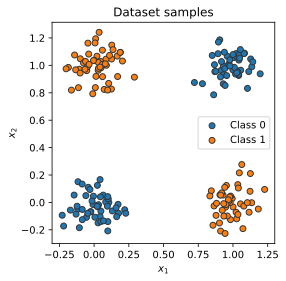

In [ ]:
visualize_samples(dataset.data, dataset.label)
plt.show()

In [ ]:
#The data loader class

#데이터 로더 클래스는 파이토치에서 torch.utils.data.DataLoader라는 이름으로 제공된다.

#이 클래스는 데이터셋을 자동으로 배치로 묶고, 데이터를 불러오는 등의 다양한 기능을 지원하는 파이썬 반복 객체를 나타냄.

#shuffle:데이터를 무작위 순서로 반환 / 훈련과정에서 무작위성을 도입하여 모델이 다양한 패턴을 학습하도록 도와줌.
#num_workers:데이터를 불러올때 사용할 서브프로세스의 수를 설정
#(기본값0-이때 데이터가 메인 프로세서에 불러와짐, 로딩이 오래 걸릴수 있음.이럴때는 값을 늘리는게 좋다)

#pin_memory:True 이면 데이터로더는 텐서를반환하기 전에 CUDA고정 메모리에 복사. 메모리 사정 봐가며 유동적으로 사용해야함.
#drop_last:True 이면 지정된 배치 크기보다 작은 경우 마지막 배치가 삭제됨. 일관된 배치크기를 유지하기 위해 훈련중에만 잠재적으로 유용.

In [ ]:
data_loader = data.DataLoader(dataset, batch_size=8, shuffle=True)
#dataset은 내가 클래스로 정해주고, dataloader는 파이토치 모듈안에 이미 존재하는 것 같다.

In [ ]:
# next(iter(...)) catches the first batch of the data loader
# If shuffle is True, this will return a different batch every time we run this cell
# For iterating over the whole dataset, we can simple use "for batch in data_loader: ..."
data_inputs, data_labels = next(iter(data_loader))

# The shape of the outputs are [batch_size, d_1,...,d_N] where d_1,...,d_N are the
# dimensions of the data point returned from the dataset class
print("Data inputs", data_inputs.shape, "\n", data_inputs)
print("Data labels", data_labels.shape, "\n", data_labels)

Data inputs torch.Size([8, 2]) 
 tensor([[0.9995, 0.9669],
        [0.9189, 0.0694],
        [1.0428, 1.0384],
        [0.0996, 0.0249],
        [0.9300, 0.8654],
        [0.9287, 0.0536],
        [0.0426, 0.9878],
        [1.1961, 0.9384]])
Data labels torch.Size([8]) 
 tensor([0, 1, 0, 0, 0, 1, 1, 0])


In [ ]:
#Optimization

#모델과 데이터 세트를 정의했으면, 최적화를 준비한다.
#1-데이터 로더에서 배치 가져오기
#2-배치에 대한 모델에서 예측을 얻기
#3-예측과 레이블의 차이에 따라 손실을 계산
#4-역전파: 손실을 기준으로 모든 매개변수에 대한 기울기를 계산
#5-그래디언트 방향으로 모델의 매개변수를 업데이트


#Loss modules
#nn.BCELoss()와 nn.BCEWithLogitsLoss() 두개의 정의된 손실함수가 있다.
#nn.BCELoss()가 입력으로 시그모이드를 통과한 값을 받는데 반해 nn.BCEWithLogitsLoss()은
#입력값이 로짓값인 것을 전제로 하여, 함수내부에서 로짓 값을 자동으로 시그모이드 함수에 넣어
#확률로 변환한 다음 BCE손실을 계산한다. - 이는 수치적으로 더 안정적이다.
#따라서 로짓이 적용된 손실함수를 사용할 때는 출력에 시그모이드를 적용하지 않도록 주의

In [ ]:
loss_module = nn.BCEWithLogitsLoss()

In [ ]:
#Stochastic gradient descent 확률적 경사 하강법

#torch.optim - torch.optim.SGD

# Input to the optimizer are the parameters of the model: model.parameters()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

#optimizer.zero_grad() - 모든 매개변수의 기울기를 0으로 설정/역전파를 수행하기 전 중요한 사전단계
#역전파를 통해 미분 값을 계산 시, 기본적으로 미분값은 파라미터에 더해진다.
#이때 각 배치바다 새로운 미분 값을 계산하고 이를 기반으로 파라미터를 올바르게 업데이트 하기
#위해서는 이전 배치의 미분값을 남겨두면 안된다. 따라서 모든 배치바다optimizer.zero_grad()를 호출한다.




In [ ]:
#Training

#모델 훈련 전, 약간 더 큰 데이터 셋을 만들고 더 큰 배치크기의 데이터 로더를 지정

train_dataset = XORDataset(size=1000)
train_data_loader = data.DataLoader(train_dataset, batch_size=128, shuffle=True)

#5단계 기억 - 배치로드, 예측획득, 손실계산, 역전파, 업데이트

# Push model to device. Has to be only done once
model.to(device) #모델을 위에서 이미 정의했다.

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)

In [ ]:
#훈련중과 테스트중일때 사용되는 서로다른 모듈이 있다. 따라서, model.train() 과 model.eval()로 스위치한다.


def train_model(model, optimizer, data_loader, loss_module, num_epochs=100):
    model.train()

    # Training loop
    for epoch in tqdm(range(num_epochs)):   #tqdm = 파이썬에서 반복문의 진행상황을 시각적으로 표시해줌.
        for data_inputs, data_labels in data_loader:
            # Step 1: Move input data to device (only strictly necessary if we use GPU)
            data_inputs = data_inputs.to(device)
            data_labels = data_labels.to(device)

            # Step 2: Run the model on the input data
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)  # Output is [Batch size, 1], but we want [Batch size]

            # Step 3: Calculate the loss
            loss = loss_module(preds, data_labels.float())

            # Step 4: Perform backpropagation
            # Before calculating the gradients, we need to ensure that they are all zero.
            # The gradients would not be overwritten, but actually added to the existing ones.
            optimizer.zero_grad()
            # Perform backpropagation
            loss.backward()

            # Step 5: Update the parameters
            optimizer.step()

In [ ]:
train_model(model, optimizer, train_data_loader, loss_module)

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
#모델 저장 - 파라미터 저장

state_dict = model.state_dict() #파라미터를 담고 있는 딕셔너리
print(state_dict)

OrderedDict([('linear1.weight', tensor([[ 1.9703, -2.3484],
        [-0.6047,  0.0454],
        [ 2.6473, -2.3114],
        [-1.1799, -0.9869]], device='cuda:0')), ('linear1.bias', tensor([-0.9203, -0.4652,  1.1698, -0.2060], device='cuda:0')), ('linear2.weight', tensor([[ 2.9751, -0.3390, -3.0778, -1.5865]], device='cuda:0')), ('linear2.bias', tensor([1.2967], device='cuda:0'))])


In [ ]:
#모델의 상태를 저장한 것을 파일로 저장

# torch.save(object, filename). For the filename, any extension can be used
torch.save(state_dict, "our_model.tar")

In [ ]:
# Load state dict from the disk (make sure it is the same name as above)
state_dict = torch.load("our_model.tar")

# Create a new model and load the state
new_model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
new_model.load_state_dict(state_dict)

# Verify that the parameters are the same
print("Original model\n", model.state_dict())
print("\nLoaded model\n", new_model.state_dict())

#동일한 파라미터 도출

Original model
 OrderedDict([('linear1.weight', tensor([[ 1.9703, -2.3484],
        [-0.6047,  0.0454],
        [ 2.6473, -2.3114],
        [-1.1799, -0.9869]], device='cuda:0')), ('linear1.bias', tensor([-0.9203, -0.4652,  1.1698, -0.2060], device='cuda:0')), ('linear2.weight', tensor([[ 2.9751, -0.3390, -3.0778, -1.5865]], device='cuda:0')), ('linear2.bias', tensor([1.2967], device='cuda:0'))])

Loaded model
 OrderedDict([('linear1.weight', tensor([[ 1.9703, -2.3484],
        [-0.6047,  0.0454],
        [ 2.6473, -2.3114],
        [-1.1799, -0.9869]])), ('linear1.bias', tensor([-0.9203, -0.4652,  1.1698, -0.2060])), ('linear2.weight', tensor([[ 2.9751, -0.3390, -3.0778, -1.5865]])), ('linear2.bias', tensor([1.2967]))])


<ipython-input-41-e81ffd59f3f2>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load("our_model.tar")


In [ ]:
#evaluation

#먼저, 데이터 로더가 있는 데스트 세트를 만들어야 함.
test_dataset = XORDataset(size=500)
# drop_last -> Don't drop the last batch although it is smaller than 128
test_data_loader = data.DataLoader(test_dataset, batch_size=128, shuffle=False, drop_last=False)

In [ ]:
#모델 평가시 그래디언트 계산 할 필요 X, 따라서 평가모드에서는 계산그래프를 비활성화(속도 빨라짐)

def eval_model(model, data_loader):
    model.eval()  # Set model to eval mode
    true_preds, num_preds = 0.0, 0.0

    with torch.no_grad():  # Deactivate gradients for the following code
        for data_inputs, data_labels in data_loader:
            # Determine prediction of model on dev set
            data_inputs, data_labels = data_inputs.to(device), data_labels.to(device)
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)
            preds = torch.sigmoid(preds)  # Sigmoid to map predictions between 0 and 1
            pred_labels = (preds >= 0.5).long()  # Binarize predictions to 0 and 1

            # Keep records of predictions for the accuracy metric (true_preds=TP+TN, num_preds=TP+TN+FP+FN)
            true_preds += (pred_labels == data_labels).sum()
            num_preds += data_labels.shape[0]

    acc = true_preds / num_preds
    print(f"Accuracy of the model: {100.0*acc:4.2f}%")

In [ ]:
eval_model(model, test_data_loader)

Accuracy of the model: 99.80%


/usr/local/lib/python3.10/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


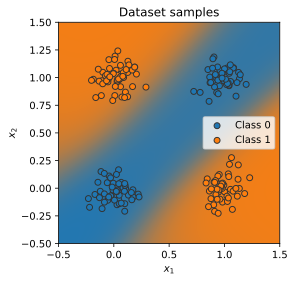

In [ ]:
#분류 경계 시각화 Visualizing classification boundaries


@torch.no_grad()  # Decorator, same effect as "with torch.no_grad(): ..." over the whole function.
def visualize_classification(model, data, label):
    if isinstance(data, Tensor):
        data = data.cpu().numpy()
    if isinstance(label, Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    plt.figure(figsize=(4, 4))
    plt.scatter(data_0[:, 0], data_0[:, 1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:, 0], data_1[:, 1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

    # Let's make use of a lot of operations we have learned above
    model.to(device)
    c0 = Tensor(to_rgba("C0")).to(device)
    c1 = Tensor(to_rgba("C1")).to(device)
    x1 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    x2 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    xx1, xx2 = torch.meshgrid(x1, x2)  # Meshgrid function as in numpy
    model_inputs = torch.stack([xx1, xx2], dim=-1)
    preds = model(model_inputs)
    preds = torch.sigmoid(preds)
    # Specifying "None" in a dimension creates a new one
    output_image = (1 - preds) * c0[None, None] + preds * c1[None, None]
    output_image = (
        output_image.cpu().numpy()
    )  # Convert to numpy array. This only works for tensors on CPU, hence first push to CPU
    plt.imshow(output_image, origin="lower", extent=(-0.5, 1.5, -0.5, 1.5))
    plt.grid(False)


visualize_classification(model, dataset.data, dataset.label)
plt.show()
